## Batch Inference

**Import libraries**

In [2]:
import pandas as pd
import xgboost
import os
import joblib
from scripts import feature_store, feature_processing

**Set path to feature store YAML file**

In [3]:
# Path to the YAML configuration file
yaml_file_path = ('feature_store/config_v1.yaml')

**Pull data from the store for which we want to have predictions**

In [4]:
# Fetch data from feature store given a certain criteria
features_df = feature_store.fetch_data_from_store("2024-03-23", yaml_file_path)
features_df

,lag_1,lag_4,lag_5,lag_6,lag_11,lag_12,lag_13,rolling_mean_7,rolling_std_7
period,,,,,,,,,
2024-03-23,130956.0,125016.0,118592.0,107680.0,124289.0,127532.0,116906.0,122652.71,7772.78
2024-03-24,122277.0,124910.0,125016.0,118592.0,120013.0,124289.0,127532.0,124159.86,4864.40
2024-03-25,118230.0,129138.0,124910.0,125016.0,120293.0,120013.0,124289.0,125235.00,4217.35
2024-03-26,126118.0,130956.0,129138.0,124910.0,119478.0,120293.0,120013.0,125303.14,4217.08
2024-03-27,125493.0,122277.0,130956.0,129138.0,109879.0,119478.0,120293.0,125439.86,4217.72
2024-03-28,125867.0,118230.0,122277.0,130956.0,107680.0,109879.0,119478.0,124931.14,3900.13
2024-03-29,125577.0,126118.0,118230.0,122277.0,118592.0,107680.0,109879.0,123498.29,3072.37
2024-03-30,120926.0,125493.0,126118.0,118230.0,125016.0,118592.0,107680.0,122283.57,4819.72
2024-03-31,113774.0,125867.0,125493.0,126118.0,124910.0,125016.0,118592.0,120792.14,7273.69


**Run predictions from all three models**

In [5]:
predictions_ls = [] # list to store predictions

# Load each model from its respective file
for idx in range(1, 4):  # Assuming there are 3 models
    filename = f'models/batch_demand_forecaster_model_{idx}.pkl'
    model = joblib.load(filename)
    prediction = model.predict(features_df)
    predictions_ls.append(prediction)

**Inspect predictions**

In [6]:
predictions_ls

[array([118230.   , 126117.99 , 125492.99 , 125866.99 , 125577.01 ,
        120925.99 , 113773.99 , 107789.99 , 119065.99 , 124167.86 ,
        124056.73 , 126710.21 , 128524.05 , 120697.11 , 119242.195,
        124183.734], dtype=float32),
 array([126118.   , 125493.02 , 125867.01 , 125576.97 , 120926.06 ,
        113773.92 , 107790.016, 119065.95 , 124079.09 , 123543.28 ,
        125909.734, 124627.14 , 125650.45 , 119737.3  , 126601.17 ,
        125125.086], dtype=float32),
 array([125493.   , 125866.89 , 125577.016, 120925.984, 113773.99 ,
        107790.06 , 119065.99 , 124079.016, 128888.98 , 128529.28 ,
        124834.4  , 121312.48 , 121054.82 , 127569.7  , 127786.33 ,
        128262.28 ], dtype=float32)]

**Compare to true values**

(Note: You would normally do this in hindsight, but remember the last 7 dates were not used for training!)

In [7]:
targets_df = feature_store.fetch_data_from_store("2024-03-23", yaml_file_path, targets=True)
targets_df

,target_1d,target_2d,target_3d
period,,,
2024-03-23,118230.0,126118.0,125493.0
2024-03-24,126118.0,125493.0,125867.0
2024-03-25,125493.0,125867.0,125577.0
2024-03-26,125867.0,125577.0,120926.0
2024-03-27,125577.0,120926.0,113774.0
2024-03-28,120926.0,113774.0,107790.0
2024-03-29,113774.0,107790.0,119066.0
2024-03-30,107790.0,119066.0,124079.0
2024-03-31,119066.0,124079.0,128889.0


**Put predictions next to true values for easier comparison**

Everything after 28 March was not used in training

In [8]:
predictions_df = pd.DataFrame({f'predicted_{i+1}d': predictions_ls[i] for i in range(len(predictions_ls))})
predictions_df.index = features_df.index
result_df = predictions_df.join(targets_df, how = "inner")
result_df

,predicted_1d,predicted_2d,predicted_3d,target_1d,target_2d,target_3d
period,,,,,,
2024-03-23,118230.000000,126118.000000,125493.000000,118230.0,126118.0,125493.0
2024-03-24,126117.992188,125493.023438,125866.890625,126118.0,125493.0,125867.0
2024-03-25,125492.992188,125867.007812,125577.015625,125493.0,125867.0,125577.0
2024-03-26,125866.992188,125576.968750,120925.984375,125867.0,125577.0,120926.0
2024-03-27,125577.007812,120926.062500,113773.992188,125577.0,120926.0,113774.0
2024-03-28,120925.992188,113773.921875,107790.062500,120926.0,113774.0,107790.0
2024-03-29,113773.992188,107790.015625,119065.992188,113774.0,107790.0,119066.0
2024-03-30,107789.992188,119065.953125,124079.015625,107790.0,119066.0,124079.0
2024-03-31,119065.992188,124079.093750,128888.976562,119066.0,124079.0,128889.0


**Compare the results visually**

Explore by changing the date

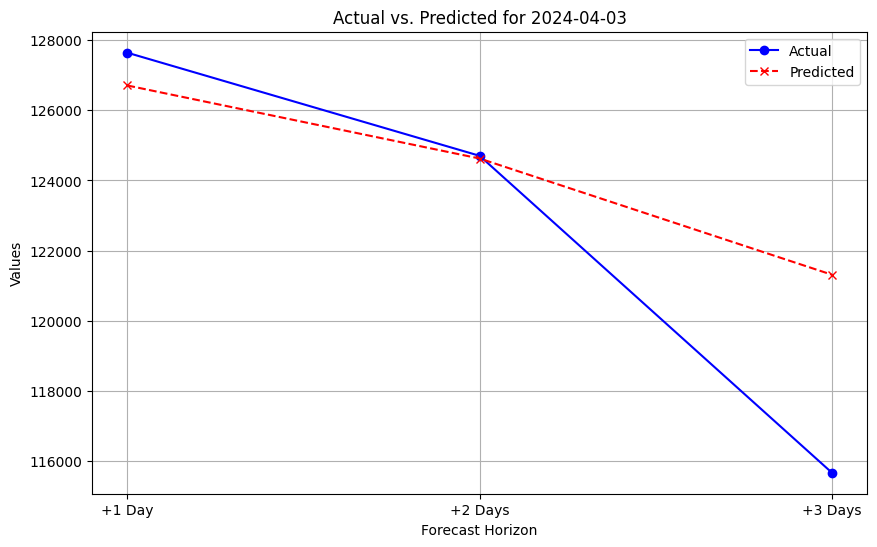

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_forecast(data, date):
    # Select the data for the specific date
    daily_data = data.loc[date]

    # Prepare the data for plotting
    actuals = [daily_data['target_1d'], daily_data['target_2d'], daily_data['target_3d']]
    predictions = [daily_data['predicted_1d'], daily_data['predicted_2d'], daily_data['predicted_3d']]

    plt.figure(figsize=(10, 6))
    days = ['+1 Day', '+2 Days', '+3 Days']
    
    plt.plot(days, actuals, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(days, predictions, label='Predicted', marker='x', linestyle='--', color='red')
    
    plt.title(f'Actual vs. Predicted for {date}')
    plt.xlabel('Forecast Horizon')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_forecast(result_df, '2024-04-03')

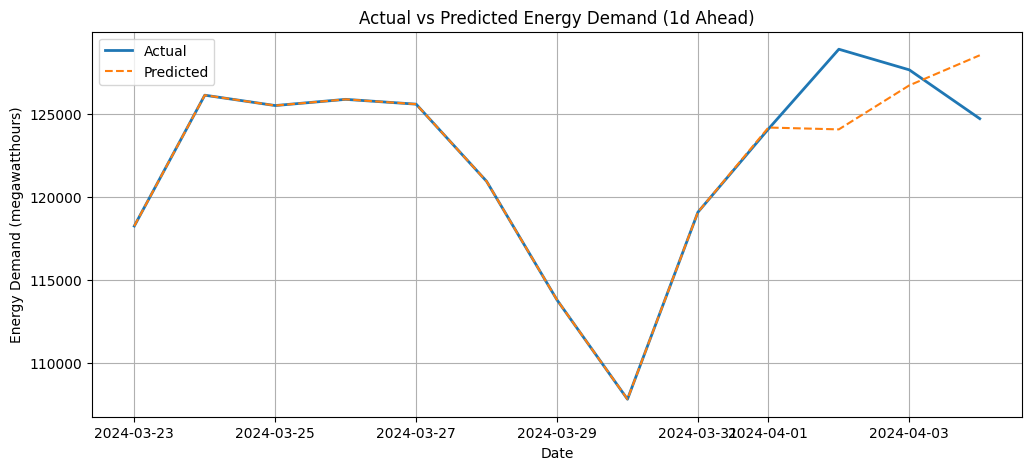

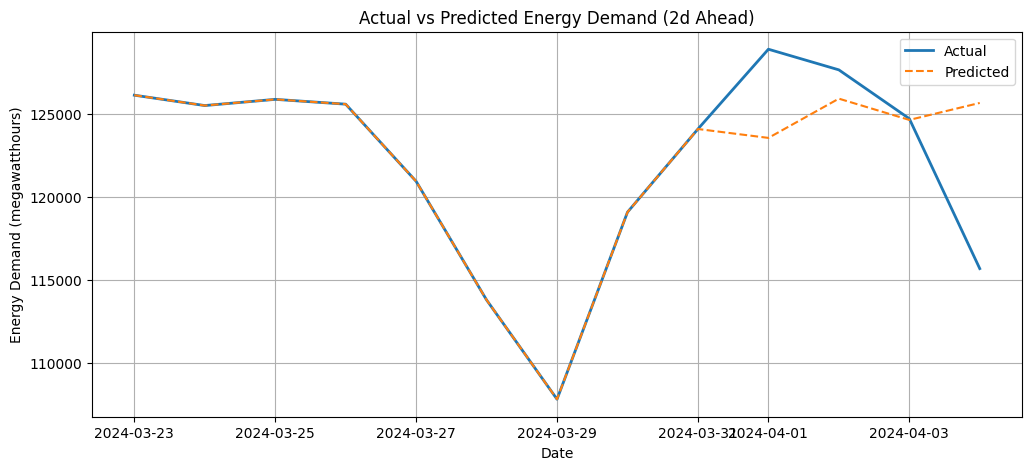

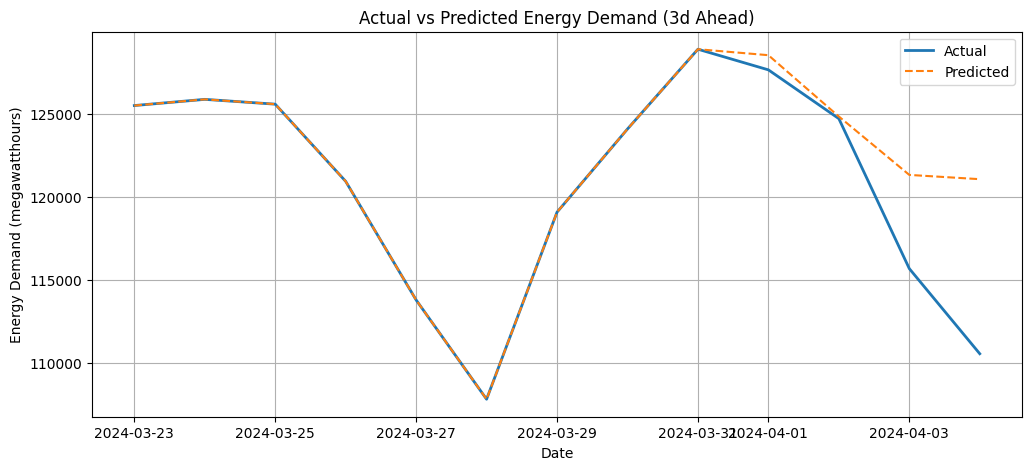

In [10]:
import matplotlib.pyplot as plt

# Plot for each horizon
for h in ['1d', '2d', '3d']:
    plt.figure(figsize=(12,5))
    
    # Actual values
    plt.plot(
        result_df.index,
        result_df[f'target_{h}'],
        label='Actual',
        linewidth=2
    )
    
    # Predicted values
    plt.plot(
        result_df.index,
        result_df[f'predicted_{h}'],
        label='Predicted',
        linestyle='--'
    )
    
    plt.title(f'Actual vs Predicted Energy Demand ({h} Ahead)')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand (megawatthours)')
    plt.legend()
    plt.grid(True)
    plt.show()


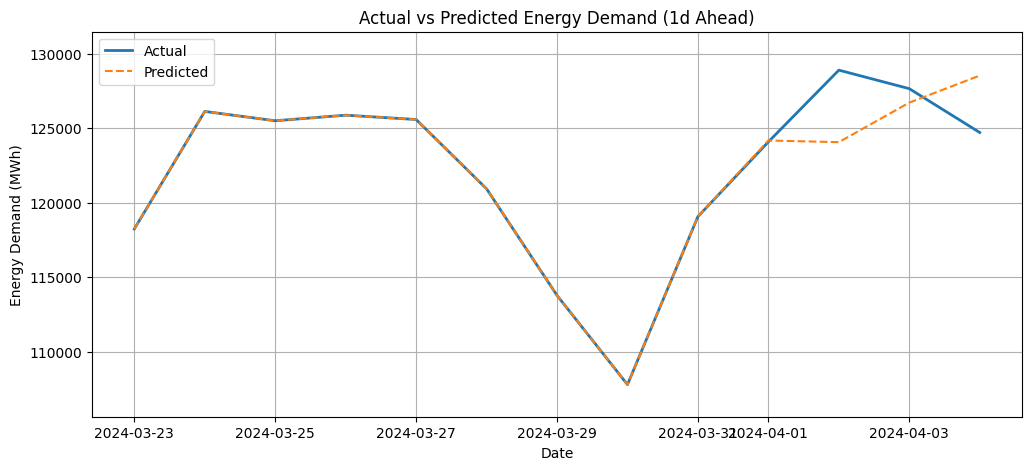

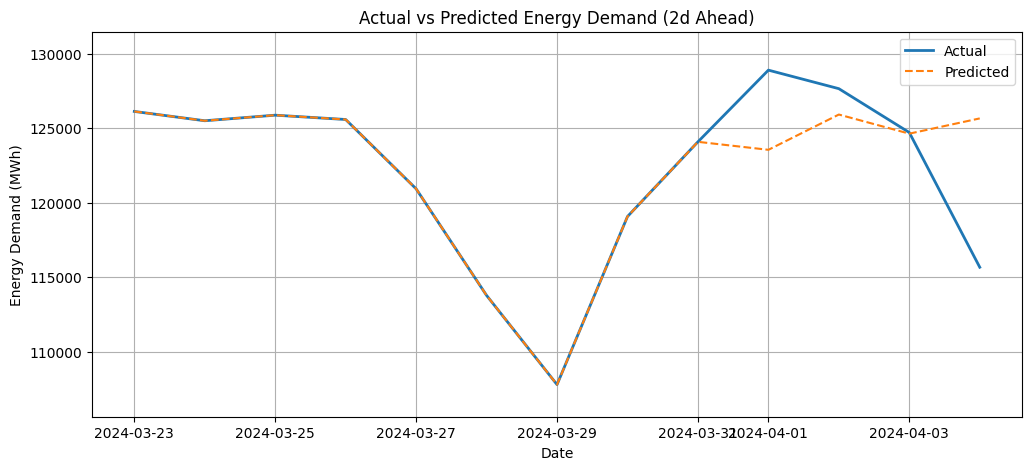

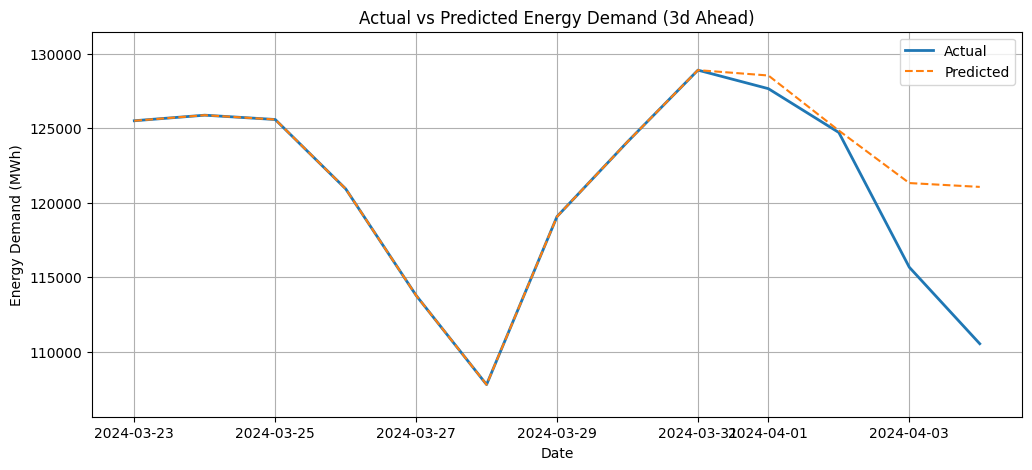

In [11]:
import matplotlib.pyplot as plt

# Plot for each horizon with zoomed y-axis
for h in ['1d', '2d', '3d']:
    plt.figure(figsize=(12,5))
    
    actual = result_df[f'target_{h}']
    predicted = result_df[f'predicted_{h}']
    
    plt.plot(result_df.index, actual, label='Actual', linewidth=2)
    plt.plot(result_df.index, predicted, label='Predicted', linestyle='--')
    
    plt.title(f'Actual vs Predicted Energy Demand ({h} Ahead)')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand (MWh)')
    plt.legend()
    plt.grid(True)
    
    # Adjust y-axis to zoom in on data for better visual comparison
    ymin = min(actual.min(), predicted.min()) * 0.98  # 2% lower
    ymax = max(actual.max(), predicted.max()) * 1.02  # 2% higher
    plt.ylim(ymin, ymax)
    
    plt.show()


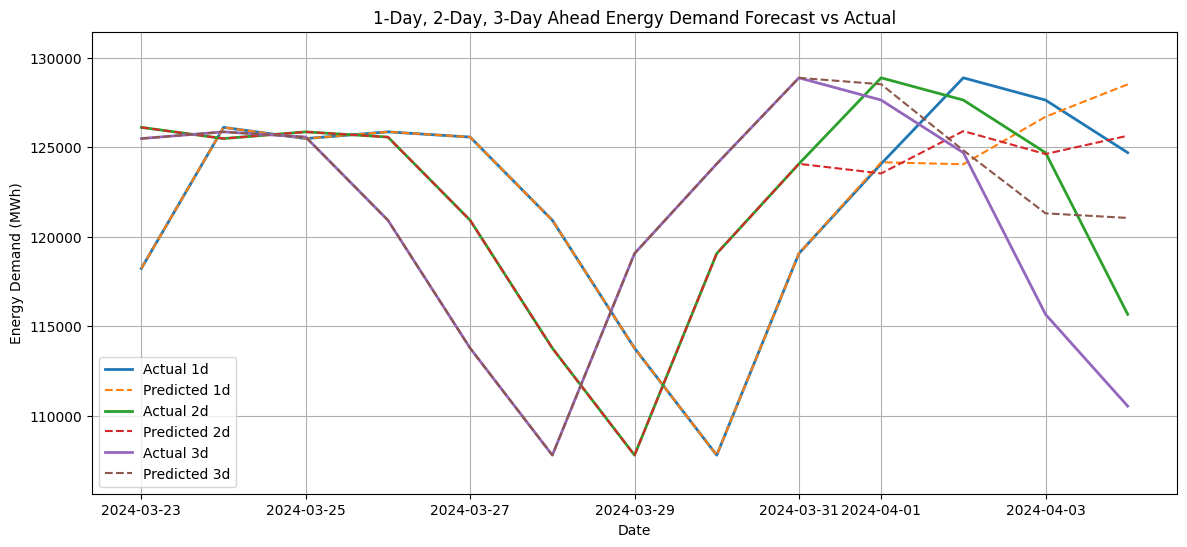

In [12]:
import matplotlib.pyplot as plt

# Only the horizon columns
horizons = ['1d', '2d', '3d']

plt.figure(figsize=(14,6))

for h in horizons:
    actual = result_df[f'target_{h}']
    predicted = result_df[f'predicted_{h}']
    
    plt.plot(result_df.index, actual, label=f'Actual {h}', linewidth=2)
    plt.plot(result_df.index, predicted, linestyle='--', label=f'Predicted {h}')

plt.title('1-Day, 2-Day, 3-Day Ahead Energy Demand Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy Demand (MWh)')
plt.legend()
plt.grid(True)

# Zoom y-axis to see small differences
ymin = min(result_df[['target_1d','target_2d','target_3d','predicted_1d','predicted_2d','predicted_3d']].min()) * 0.98
ymax = max(result_df[['target_1d','target_2d','target_3d','predicted_1d','predicted_2d','predicted_3d']].max()) * 1.02
plt.ylim(ymin, ymax)

plt.show()


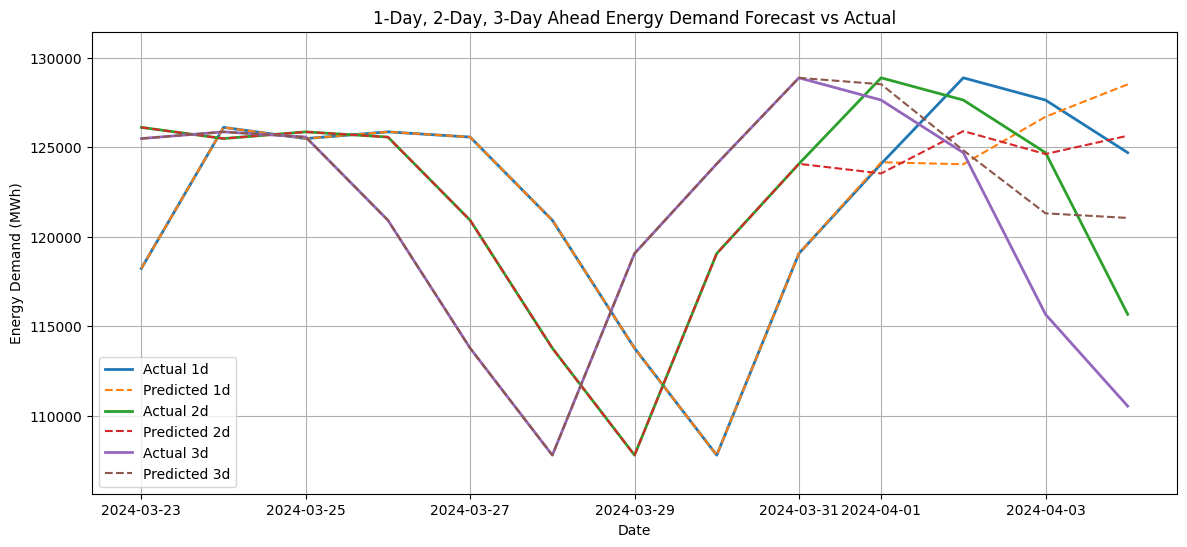

In [13]:
import matplotlib.pyplot as plt

# Only the horizon columns
horizons = ['1d', '2d', '3d']

plt.figure(figsize=(14,6))

for h in horizons:
    actual = result_df[f'target_{h}']
    predicted = result_df[f'predicted_{h}']
    
    plt.plot(result_df.index, actual, label=f'Actual {h}', linewidth=2)
    plt.plot(result_df.index, predicted, linestyle='--', label=f'Predicted {h}')

plt.title('1-Day, 2-Day, 3-Day Ahead Energy Demand Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy Demand (MWh)')
plt.legend()
plt.grid(True)

# Zoom y-axis to see small differences
ymin = min(result_df[['target_1d','target_2d','target_3d','predicted_1d','predicted_2d','predicted_3d']].min()) * 0.98
ymax = max(result_df[['target_1d','target_2d','target_3d','predicted_1d','predicted_2d','predicted_3d']].max()) * 1.02
plt.ylim(ymin, ymax)

plt.show()


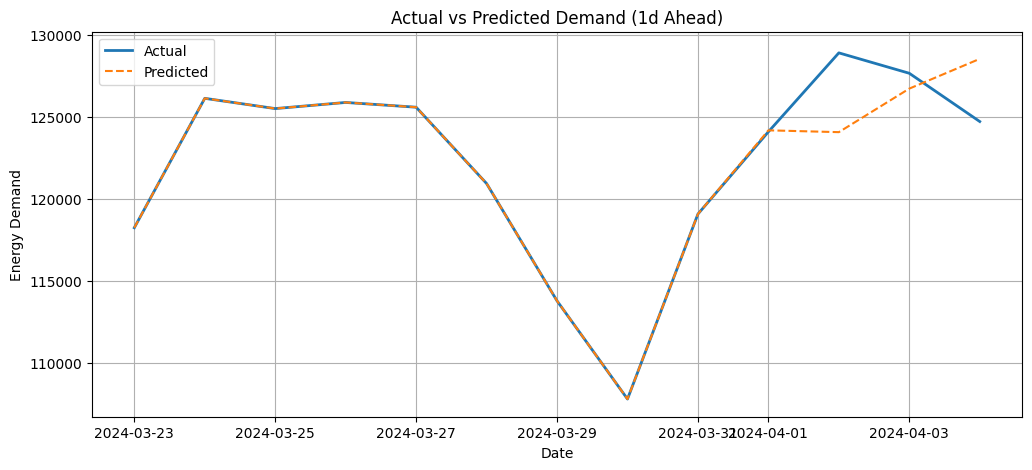

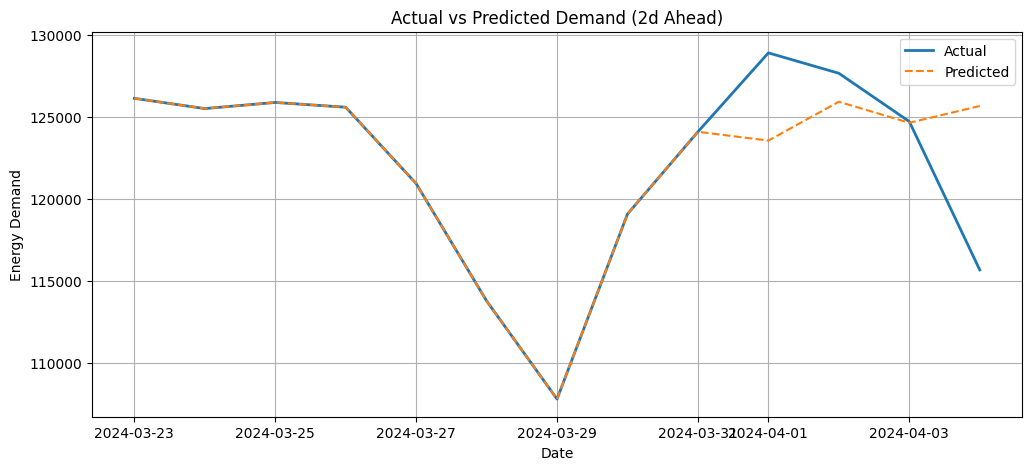

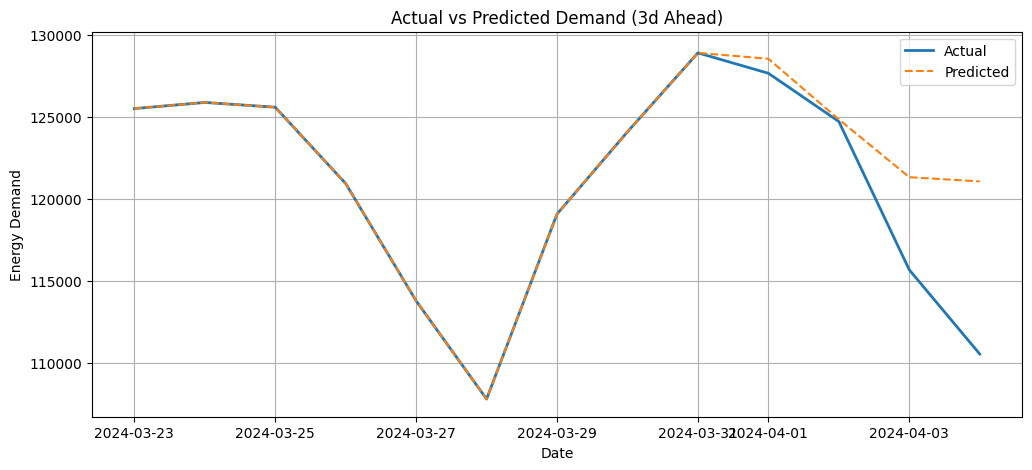

In [14]:
import matplotlib.pyplot as plt

horizons = ['1d', '2d', '3d']

for h in horizons:
    plt.figure(figsize=(12,5))
    
    plt.plot(
        result_df.index,
        result_df[f'target_{h}'],
        label='Actual',
        linewidth=2
    )
    
    plt.plot(
        result_df.index,
        result_df[f'predicted_{h}'],
        label='Predicted',
        linestyle='--'
    )

    # Zoomed scale
    ymin = min(result_df[f'target_{h}'].min(), result_df[f'predicted_{h}'].min()) * 0.99
    ymax = max(result_df[f'target_{h}'].max(), result_df[f'predicted_{h}'].max()) * 1.01
    plt.ylim(ymin, ymax)

    plt.title(f'Actual vs Predicted Demand ({h} Ahead)')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.legend()
    plt.grid(True)
    plt.show()
